Chromatic number: 3


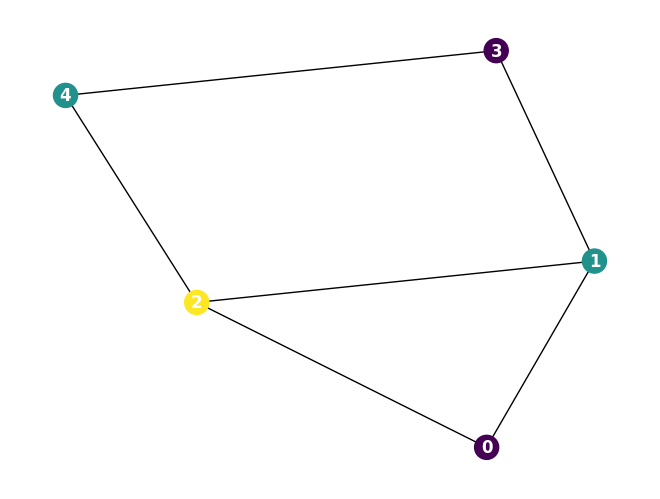

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

def hybrid_coloring(graph):
    def backtrack_coloring(graph, vertex, colors):
        if vertex == len(graph):
            return colors

        used_colors = set(colors.get(neighbour) for neighbour in graph[vertex])
        available_colors = set(range(len(graph))) - used_colors

        for color in sorted(available_colors):
            colors[vertex] = color
            result = backtrack_coloring(graph, vertex + 1, colors)
            if result:
                return result

        del colors[vertex]
        return None

    def greedy_coloring(graph):
        colors = {}
        for vertex in graph:
            used_colors = set(colors.get(neighbour) for neighbour in graph[vertex])
            available_colors = set(range(len(graph))) - used_colors
            color = min(available_colors)
            colors[vertex] = color
        return colors

    # Use the greedy algorithm as a starting point
    colors = greedy_coloring(graph)

    # Attempt to improve the coloring with backtracking
    improved_colors = backtrack_coloring(graph, 0, colors)
    if improved_colors:
        return improved_colors
    else:
        return colors

def chromatic_number(graph):
    coloring = greedy_coloring(graph)
    chromatic_number = max(coloring.values()) + 1
    return chromatic_number

def visualize_graph_with_colors(graph, colors):
    G = nx.Graph()
    pos = nx.spring_layout(graph)
    for vertex in graph:
        G.add_node(vertex, pos=pos[vertex])
    for u, v in graph.edges():
        G.add_edge(u, v)
    color_map = [colors.get(node, 0) for node in G.nodes()]
    nx.draw(G, pos, with_labels=True, node_color=color_map, font_color='white', font_weight='bold')
    plt.show()

# Example usage
graph = nx.Graph()
graph.add_edges_from([(0, 1), (0, 2), (1, 2), (1, 3), (2, 4), (3, 4)])
chromatic_number = chromatic_number(graph)
colors = greedy_coloring(graph)
print("Chromatic number:", chromatic_number)
visualize_graph_with_colors(graph, colors)
